## Homework Pandas

### ЗАДАЧА
 - В приложенных файлах вы увидите данные по прохождению студентами тестов на образовательной платформе. Такие данные могут быть использованы для построения персонализированных ИИ-ассистентов для поддержки обучения студента. На текущем этапе сосредоточимся на начальном этапе — сборе и подготовке данных.

 

### ВАМ НЕОБХОДИМО:
- Используя библиотеку pandas (или аналоги), проанализировать как можно больше характеристик, влияющих на успеваемость студентов.

### TRAIN.CSV
- row_id: (int64) идентификатор строки.
- timestamp: (int64) время в миллисекундах между этим взаимодействием с пользователем и первым завершением события от этого пользователя.
- user_id: (int32) ID-код пользователя.
- content_id: (int16) ID-код для взаимодействия с пользователем
- content_type_id: (int8) 0, если событием был вопрос, заданный пользователю, 1, если событием был просмотр пользователем лекции.
- task_container_id: (int16) Идентификационный код для пакета вопросов или лекций. Например, пользователь может увидеть три - вопроса подряд, прежде чем увидит пояснения к любому из них. Все эти трое будут иметь общий идентификатор task_container_id.
- user_answer: (int8) ответ пользователя на вопрос, если он есть. Прочитайте -1 как ноль, для лекций.
- answer_correctly: (int8), если пользователь ответил правильно. Прочитайте -1 как ноль, для лекций.
- Prior_question_elapsed_time: (float32) Среднее время в миллисекундах, которое потребовалось пользователю, чтобы ответить на каждый вопрос в предыдущем наборе вопросов, игнорируя любые промежуточные лекции. Имеет значение null для первого набора вопросов пользователя или лекции. Обратите внимание, что время — это среднее время, затраченное пользователем на решение каждого вопроса в предыдущем наборе.
- Prior_question_had_explanation: (bool) Видел ли пользователь объяснение и правильный ответ после ответа на предыдущий набор вопросов, игнорируя любые промежуточные лекции. Это значение является общим для одного пакета вопросов и равно нулю для первого пакета вопросов или лекции пользователя. Обычно первые несколько вопросов, которые видит пользователь, были частью диагностического теста на борту, где они не получали никакой обратной связи.

In [1]:
import pandas as pd

### Загрузим данные 

In [2]:
tr_data = pd.read_csv('./train.csv')

In [3]:
qu_data = pd.read_csv('./questions.csv')

In [4]:
le_data = pd.read_csv('./lectures.csv')

### Исследуем  данные с файла train.csv

In [5]:
tr_data.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [6]:
print(len(tr_data["prior_question_had_explanation"].unique()), tr_data["prior_question_had_explanation"].unique())

3 [nan False True]


Изменим тип данных tr_data["prior_question_had_explanation"] на boolean, чем сократим их размер

In [7]:
tr_data['prior_question_had_explanation'] = tr_data['prior_question_had_explanation'].astype('boolean')

In [8]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  boolean
dtypes: boolean(1), float64(1), int64(8)
memory usage: 7.0 GB


- До:memory usage: 7.5+ GB

- После: memory usage: 7.0 GB

In [9]:
tr_data.content_type_id.value_counts()

0    99271300
1     1959032
Name: content_type_id, dtype: int64

In [10]:
tr_data.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


Набор данных из train.csv упорядочен по возрастанию user_id и по возрастанию метки времени.

In [11]:
print(f'Мы имеем {tr_data.user_id.nunique()} уникальных пользователей в нашем датасете')

Мы имеем 393656 уникальных пользователей в нашем датасете


Content_type_id =  0 означает, что был задан вопрос. 1 означает, что пользователь смотрел лекцию.

In [12]:
tr_data['content_type_id'].value_counts()

0    99271300
1     1959032
Name: content_type_id, dtype: int64

Content_id — это код взаимодействия с пользователем. По сути, это вопросы, если content_type_id — вопрос (question_id: внешний ключ для столбца train/test content_id, когда тип контента — вопрос) или лекции, если content_type_id — лекция (lection_id: внешний ключ для столбца «train/test» content_id, когда тип контента — лекция)

In [13]:
print(f'Мы имеем {tr_data.content_id.nunique()} content_ids в наших данных,\
из которых {tr_data[tr_data.content_type_id == False].content_id.nunique()} являются вопросами')

Мы имеем 13782 content_ids в наших данных,из которых 13523 являются вопросами


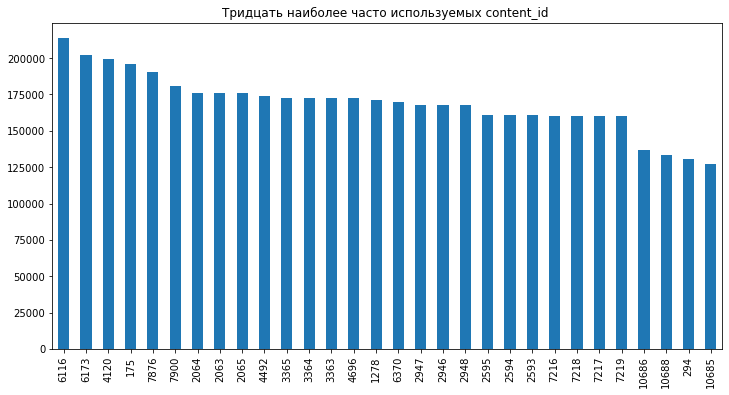

In [14]:
import matplotlib.pyplot as plt
cids = tr_data.content_id.value_counts().iloc[:30]

fig = plt.figure(figsize=(12,6))
ax = cids.plot.bar()
plt.title("Тридцать наиболее часто используемых content_id ")
plt.xticks(rotation=90)
plt.show()

task_container_id: (int64) Идентификационный код для пакета вопросов или лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидит пояснения к любому из них. Все эти трое будут иметь общий идентификатор task_container_id.

In [15]:
print(f'Мы имеем {tr_data.task_container_id.nunique()} уникальные пакеты вопросов или лекций.')

Мы имеем 10000 уникальные пакеты вопросов или лекций.


User answer. На первый взгляд вопросы множественного выбора (ответы 0-3). Значение -1  это не ответ, на самом деле означает отсутствие ответа (поскольку взаимодействие было лекцией, а не вопросом).

In [16]:
tr_data.user_answer.value_counts()

 0    28186489
 1    26990007
 3    26084784
 2    18010020
-1     1959032
Name: user_answer, dtype: int64

timestamp: (int64) время в миллисекундах между этим взаимодействием с пользователем и первым завершением события от этого пользователя. Большинство взаимодействий исходят от пользователей, которые не так долго были активны на платформе.

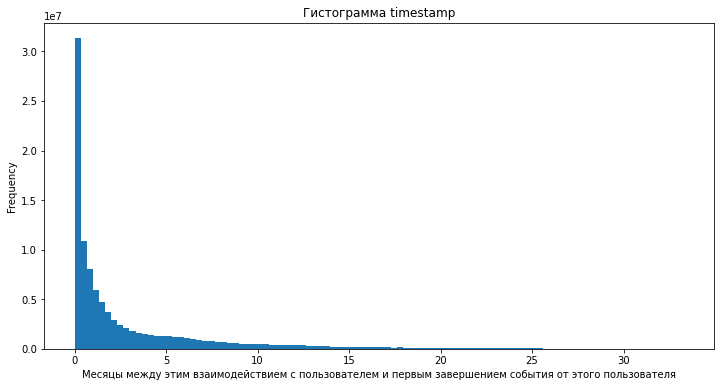

In [17]:
ts = tr_data['timestamp']/(31536000000/12) #В одном году 31 536 000 000 мс
fig = plt.figure(figsize=(12,6))
ts.plot.hist(bins=100)
plt.title("Гистограмма timestamp")
plt.xticks(rotation=0)
plt.xlabel("Месяцы между этим взаимодействием с пользователем и первым завершением события от этого пользователя")
plt.show()

Зададимся вопросом - Есть ли у нас полная история всех user_id? 

Да, если мы отфильтруем tr_data по 'timestamp'== 0, мы получим время 0 для всех пользователей.

In [18]:
print(f" Из {(tr_data['user_id'].nunique())} \
пользователей в данных у нас {(tr_data[tr_data['timestamp'] == 0]).user_id.nunique()} пользователей с timestamp= 0 ")

 Из 393656 пользователей в данных у нас 393656 пользователей с timestamp= 0 


Успеваемость студентов == Answered_correctly, Посмотрим на распределение правильный/неправильный ответ.
Не глядя на взаимодействие на лекциях (-1), мы видим, что примерно на 1/3 вопросов были даны неправильные ответы.

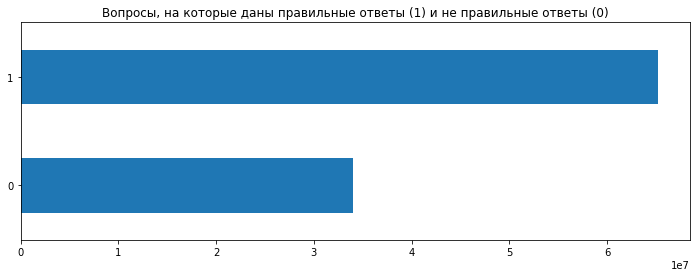

In [19]:
correct = tr_data[tr_data.answered_correctly != -1].answered_correctly.value_counts(ascending=True)

fig = plt.figure(figsize=(12,4))
correct.plot.barh()
plt.title("Вопросы, на которые даны правильные ответы (1) и не правильные ответы (0)")
plt.xticks(rotation=0)
plt.show()

In [20]:
user_percent = tr_data[tr_data.answered_correctly != -1].groupby('user_id')['answered_correctly'].agg(Mean='mean', Answers='count')

In [21]:
print(f'Наибольшее количество вопросов, на которые ответил пользователь {user_percent.Answers.max()}')

Наибольшее количество вопросов, на которые ответил пользователь 17609


### QUESTIONS.CSV: МЕТАДАННЫЕ ДЛЯ ВОПРОСОВ, ЗАДАВАЕМЫХ ПОЛЬЗОВАТЕЛЯМ.
- question_id: внешний ключ для столбца train/test content_id, когда тип контента — вопрос (0).
- bundle_id: код, для которого вопросы обслуживаются вместе.
- correct_answer: ответ на вопрос. Можно сравнить со столбцом train user_answer, чтобы проверить, был ли пользователь прав.
- part: соответствующий раздел теста TOEIC.
- tags: один или несколько подробных кодов тегов для вопроса. Значение тегов не будет предоставлено, но этих кодов достаточно для группировки вопросов вместе.

### Исследуем  данные с файла questions.csv

In [20]:
qu_data.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [21]:
qu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [22]:
qu_data.shape

(13523, 5)

Проверим, есть ли question_id без тегов. 

In [23]:
qu_data[qu_data.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


Существует ровно один question_id без хотя бы одного тега.

Рассмотрим tags

In [24]:
qu_data['tags'] = qu_data['tags'].astype(str)

tags = [x.split() for x in qu_data[qu_data.tags != "nan"].tags.values]
tags = [item for elem in tags for item in elem]
tags = set(tags)
tags = list(tags)
print(f'У нас {len(tags)} разных tags')

У нас 188 разных tags


Изменим столбец tags на списки tags для простоты доступа к значениям

In [25]:
tags_list = [x.split() for x in qu_data.tags.values]
qu_data['tags'] = tags_list
qu_data.head()



,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,"[51, 131, 162, 38]"
1,1,1,1,1,"[131, 36, 81]"
2,2,2,0,1,"[131, 101, 162, 92]"
3,3,3,0,1,"[131, 149, 162, 29]"
4,4,4,3,1,"[131, 5, 162, 38]"


Давайте выясним, сколько ответов были правильными и неправильными на question_id (то есть на content_id в tr_data).

In [26]:
#сгрупируем и получим количество
correct = tr_data[tr_data.answered_correctly != -1].groupby(["content_id", 'answered_correctly'], as_index=False).size()
#преобразуем полученный дата фрейм  
correct = correct.pivot(index= "content_id", columns='answered_correctly', values='size')
correct.columns = ['Неверно', 'Верно']
correct = correct.fillna(0)
correct[['Неверно', 'Верно']] = correct[['Неверно', 'Верно']].astype(int)
#обьединим полученный датафрейм с qu_data
qu_data = qu_data.merge(correct, left_on = "question_id", right_on = "content_id", how = "left")
qu_data.head()

,question_id,bundle_id,correct_answer,part,tags,Неверно,Верно
0,0,0,0,1,"[51, 131, 162, 38]",637,6266
1,1,1,1,1,"[131, 36, 81]",809,6589
2,2,2,0,1,"[131, 101, 162, 92]",20015,24890
3,3,3,0,1,"[131, 149, 162, 29]",5067,17906
4,4,4,3,1,"[131, 5, 162, 38]",12275,19461


### LECTURES.CSV: МЕТАДАТЫ ЛЕКЦИЙ, ПРОСМОТРЕННЫХ ПОЛЬЗОВАТЕЛЯМИ ПО мере их обучения.
- «lection_id»: внешний ключ для столбца «train/test» content_id, когда тип контента — «лекция» (1).
- part: код категории верхнего уровня для лекции.
- tag: один код тега для лекции. Значение тегов не будет предоставлено, но этих кодов достаточно для группировки лекций.
- type_of: краткое описание основной цели лекции.

### Исследуем  данные с файла lectures.csv

In [26]:
le_data.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [27]:
le_data.info

<bound method DataFrame.info of      lecture_id  tag  part           type_of
0            89  159     5           concept
1           100   70     1           concept
2           185   45     6           concept
3           192   79     5  solving question
4           317  156     5  solving question
..          ...  ...   ...               ...
413       32535    8     5  solving question
414       32570  113     3  solving question
415       32604   24     6           concept
416       32625  142     2           concept
417       32736   82     3           concept

[418 rows x 4 columns]>

In [28]:
print(f'У нас {le_data.shape[0]} lecture_ids.')

У нас 418 lecture_ids.


Посмотрим графически распределение типов лекций

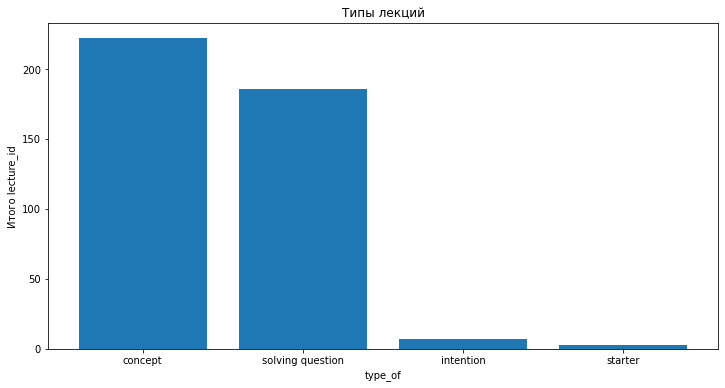

In [29]:
lect_type_of = le_data.type_of.value_counts()

fig = plt.figure(figsize=(12,6))
plt.bar(lect_type_of.index, lect_type_of.values)
plt.title("Типы лекций")
plt.xlabel("type_of")
plt.ylabel("Итого lecture_id")
plt.xticks(rotation=0)
plt.show()


# Итоги:

В процессе рассмотрения данных с файлами  были проанализированны все характеристики, преобразован формат и добавленны дополнительные. У нас практически все признаки категориальные, за исключением нескольких числовых - времени. Датасет разбит на пользователей и требуется для получения рабочих признаков постоянно делать группировку по условию.